In [1]:
import numpy as np
import pandas as pd

In [2]:
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [3]:
def linar_loss(X, y, w, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train
    dw = np.dot(X.T, (y_hat-y)) /num_train
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [4]:
def linar_train(X, y, learning_rate=0.01, epochs=30000):
    #loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = linar_loss(X, y, w, b)
        w += -learning_rate * dw
        b += -learning_rate * db
        #loss_list.append(loss)
        
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
        
        params = {
            'w': w,
            'b': b
        }
        
        grads = {
            'dw': dw,
            'db': db
        }
            
    return loss, params, grads

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [6]:
from sklearn.utils import shuffle
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

(397, 10) (397, 1) (45, 10) (45, 1)
X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


In [7]:
loss, params, grads = linar_train(X_train, y_train, 0.001, 100000)

epoch 10000 loss 5533.039734
epoch 20000 loss 5217.582409
epoch 30000 loss 4949.676466
epoch 40000 loss 4721.504031
epoch 50000 loss 4526.567333
epoch 60000 loss 4359.463960
epoch 70000 loss 4215.700505
epoch 80000 loss 4091.538010
epoch 90000 loss 3983.863771


In [10]:
params

{'w': array([[  44.07229775],
        [  -6.99872355],
        [ 157.0665895 ],
        [ 118.32921584],
        [  37.47920655],
        [  24.97681831],
        [-104.31188822],
        [ 104.03504877],
        [ 148.85521477],
        [  94.07047013]]), 'b': 151.57222424703687}

In [8]:
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454]])

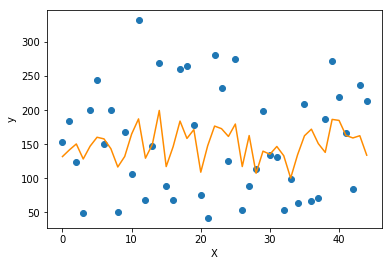

In [10]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

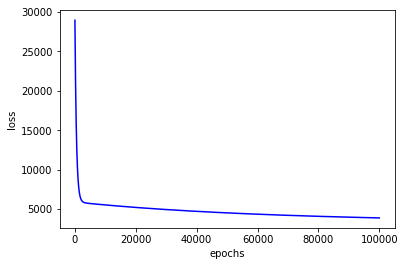

In [13]:
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [11]:
from sklearn.utils import shuffle
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
data = np.concatenate((X, y.reshape((-1,1))), axis=1)
data.shape

(442, 11)

In [36]:
from random import shuffle

def k_fold_cross_validation(items, k, randomize=True):
    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        training = np.array(training)
        validation = np.array(validation)
        yield training, validation



for training, validation in k_fold_cross_validation(data, 5): 
    X_train = training[:, :10]
    y_train = training[:, -1].reshape((-1,1))
    X_valid = validation[:, :10]
    y_valid = validation[:, -1].reshape((-1,1))
    loss5 = []
    #print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
    loss, params, grads = linar_train(X_train, y_train, 0.001, 100000)
    loss5.append(loss)
    score = np.mean(loss5)
    print('five kold cross validation score is', score)
    y_pred = predict(X_valid, params)
    valid_score = np.sum(((y_pred-y_valid)**2))/len(X_valid)
    print('valid score is', valid_score)

(353, 10) (353, 1) (89, 10) (89, 1)
epoch 10000 loss 5667.323261
epoch 20000 loss 5365.061628
epoch 30000 loss 5104.951009
epoch 40000 loss 4880.559191
epoch 50000 loss 4686.465012
epoch 60000 loss 4518.097942
epoch 70000 loss 4371.603217
epoch 80000 loss 4243.728424
epoch 90000 loss 4131.728130
five kold cross validation score is 4033.2928969313452
valid score is 3558.147428823725
(353, 10) (353, 1) (89, 10) (89, 1)
epoch 10000 loss 5517.461607
epoch 20000 loss 5181.523292
epoch 30000 loss 4897.000442
epoch 40000 loss 4655.280406
epoch 50000 loss 4449.235361
epoch 60000 loss 4272.963989
epoch 70000 loss 4121.578253
epoch 80000 loss 3991.027359
epoch 90000 loss 3877.952427
five kold cross validation score is 3779.575673476155
valid score is 4389.749894361285
(354, 10) (354, 1) (88, 10) (88, 1)
epoch 10000 loss 5677.526932
epoch 20000 loss 5331.464606
epoch 30000 loss 5038.541403
epoch 40000 loss 4789.859079
epoch 50000 loss 4578.047735
epoch 60000 loss 4397.001364
epoch 70000 loss 4241

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
y = y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353, 1) (89, 10) (89, 1)


Coefficients: 
 [[ -23.510405 -216.31221   472.3672    372.07184  -863.69977   583.276
   105.79429   194.7704    754.07404    38.22214 ]]
Mean squared error: 3028.50
Variance score: 0.53


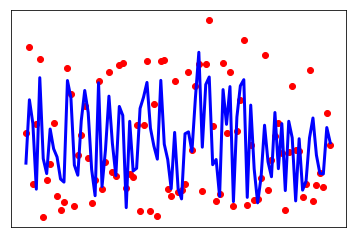

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(range(X_test.shape[0]), y_test, color='red')
plt.plot(range(X_test.shape[0]), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [47]:
def R2(ypred, ytrue):
    y_avg = np.mean(ytrue)
    SS_tot = np.sum((ytrue - y_avg)**2)
    SS_res = np.sum((ytrue - ypred)**2)
    r2 = 1 - (SS_res/SS_tot)
    return r2

In [50]:
print(X.shape, y.shape)

(442, 10) (442, 1)


In [55]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

def cross_validate(model, x, y, folds=5, repeats=5):
    
    ypred = np.zeros((len(y),repeats))
    score = np.zeros(repeats)
    for r in range(repeats):
        i=0
        print('Cross Validating - Run', str(r + 1), 'out of', str(repeats))
        x,y = shuffle(x, y, random_state=r) #shuffle data before each repeat
        kf = KFold(n_splits=folds,random_state=i+1000) #random split, different each time
        for train_ind, test_ind in kf.split(x):
            print('Fold', i+1, 'out of', folds)
            xtrain,ytrain = x[train_ind,:],y[train_ind]
            xtest,ytest = x[test_ind,:],y[test_ind]
            model.fit(xtrain, ytrain)
            #print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
            ypred[test_ind]=model.predict(xtest)
            i+=1
        score[r] = R2(ypred[:,r],y)
    print('\nOverall R2:',str(score))
    print('Mean:',str(np.mean(score)))
    print('Deviation:',str(np.std(score)))
    pass

cross_validate(regr, X, y, folds=5, repeats=5)

Cross Validating - Run 1 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 2 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 3 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 4 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 5 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5

Overall R2: [-670.4095204  -671.45443974 -673.60734422 -671.40192667 -675.31208185]
Mean: -672.437062575318
Deviation: 1.77669784591671


In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2018/8/29 14:45
# @Author  : louwill
# @File    : lr_class.py
# @mail: ygnjd2016@gmail.com


import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes

class lr_model():
    def __init__(self):
        pass

    def prepare_data(self):
        data = load_diabetes().data
        target = load_diabetes().target
        X, y = shuffle(data, target, random_state=42)
        X = X.astype(np.float32)
        y = y.reshape((-1, 1))
        data = np.concatenate((X, y), axis=1)
        return data


    def initialize_params(self, dims):
        w = np.zeros((dims, 1))
        b = 0
        return w, b


    def linear_loss(self, X, y, w, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        y_hat = np.dot(X, w) + b
        loss = np.sum((y_hat-y)**2) / num_train
        dw = np.dot(X.T, (y_hat - y)) / num_train
        db = np.sum((y_hat - y)) / num_train
        return y_hat, loss, dw, db


    def linear_train(self, X, y, learning_rate, epochs):
        w, b = self.initialize_params(X.shape[1])
        for i in range(1, epochs):
            y_hat, loss, dw, db = self.linear_loss(X, y, w, b)
            w += -learning_rate * dw
            b += -learning_rate * db

            if i % 10000 == 0:
                print('epoch %d loss %f' % (i, loss))
            params = {
                'w': w,
                'b': b
            }
            grads = {
                'dw': dw,
                'db': db
            }
        return loss, params, grads


    def predict(self, X, params):
        w = params['w']
        b = params['b']
        y_pred = np.dot(X, w) + b
        return y_pred


    def linear_cross_validation(self, data, k, randomize=True):
        if randomize:
            data = list(data)
            shuffle(data)

        slices = [data[i::k] for i in range(k)]
        for i in range(k):
            validation = slices[i]
            train = [data
                        for s in slices if s is not validation
                        for data in s]
            train = np.array(train)
            validation = np.array(validation)
            yield train, validation


if __name__ == '__main__':
    lr = lr_model()
    data = lr.prepare_data()
    for train, validation in lr.linear_cross_validation(data, 5):
        X_train = train[:, :10]
        y_train = train[:, -1].reshape((-1, 1))
        X_valid = validation[:, :10]
        y_valid = validation[:, -1].reshape((-1, 1))

        loss5 = []
        loss, params, grads = lr.linear_train(X_train, y_train, 0.001, 100000)
        loss5.append(loss)
        score = np.mean(loss5)
        print('five kold cross validation score is', score)
        y_pred = lr.predict(X_valid, params)
        valid_score = np.sum(((y_pred - y_valid) ** 2)) / len(X_valid)
        print('valid score is', valid_score)